# EDA for Customer Loyalty 

In [1]:
# importing the basic modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sb

print('Libs are imported!!')

Libs are imported!!


In [2]:
loyalty_data = pd.DataFrame()

loyalty_data = pd.read_csv('D:/airlne_loyality_project/data/customer_loyalty_history.csv')

loyalty_data.tail(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16727,546773,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Married,Star,52811.49,Standard,2015,9,NaN,NaN
16728,302628,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,61718.0,Single,Star,55277.45,Standard,2013,3,NaN,NaN
16729,302460,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,88425.0,Married,Star,56675.94,Standard,2014,9,NaN,NaN
16730,672917,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,76778.0,Single,Star,58166.55,Standard,2015,1,2015.0,9.0
16731,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,College,NaN,Single,Star,61134.68,Standard,2012,9,NaN,NaN
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


# Data Sanity Checks

In [3]:
loyalty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [4]:
# Rename the columns to a standard format for analysis

loyalty_data = loyalty_data.rename(columns = { 'Loyalty Number' : 'loyalty_number', 'Country' : 'country',
                                              'Province' : 'province', 'City':'city', 'Postal Code' : 'postal_code', 'Gender':'gender', 'Education':'education',
                                              'Salary' : 'salary', 'Marital Status' : 'maratial_status', 'Loyalty Card':'loyalty_card', 'CLV':'clv', 
                                              'Enrollment Type':'enrollment_type', 'Enrollment Year':'enrollment_year', 'Enrollment Month':'enrollment_month', 
                                              'Cancellation Year':'cancellation_year','Cancellation Month':'cancellation_month'
})

loyalty_data.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,maratial_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [5]:
# Handelling nulls and nan

loyalty_data = loyalty_data.fillna(0)
loyalty_data = loyalty_data.astype({'salary': int ,'cancellation_year': int, 'cancellation_month': int}) 
loyalty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loyalty_number      16737 non-null  int64  
 1   country             16737 non-null  object 
 2   province            16737 non-null  object 
 3   city                16737 non-null  object 
 4   postal_code         16737 non-null  object 
 5   gender              16737 non-null  object 
 6   education           16737 non-null  object 
 7   salary              16737 non-null  int64  
 8   maratial_status     16737 non-null  object 
 9   loyalty_card        16737 non-null  object 
 10  clv                 16737 non-null  float64
 11  enrollment_type     16737 non-null  object 
 12  enrollment_year     16737 non-null  int64  
 13  enrollment_month    16737 non-null  int64  
 14  cancellation_year   16737 non-null  int64  
 15  cancellation_month  16737 non-null  int64  
dtypes: f

In [6]:
#Combine year and month to create date strings

loyalty_data['date_str_e'] = loyalty_data['enrollment_year'].astype(str) + '-' + loyalty_data['enrollment_month'].astype(str).str.zfill(2)
loyalty_data['date_str_c'] = loyalty_data['cancellation_year'].astype(str) + '-' + loyalty_data['cancellation_month'].astype(str).str.zfill(2)

# Convert to datetime
loyalty_data['enrollment_date'] = pd.to_datetime(loyalty_data['date_str_e'], format='%Y-%m').dt.strftime('%Y-%m')
loyalty_data['cancellation_date'] = pd.to_datetime(loyalty_data['date_str_c'], format='%Y-%m',  errors='coerce').dt.strftime('%Y-%m')

# Drop temp string columns (fix: no assignment)
loyalty_data.drop(columns=['date_str_e', 'date_str_c'], inplace=True)

# Preview
loyalty_data.head(20)


,loyalty_number,country,province,city,postal_code,gender,education,salary,maratial_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,0,0,2016-02,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,0,Divorced,Star,3839.61,Standard,2016,3,0,0,2016-03,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,0,Single,Star,3839.75,Standard,2014,7,2018,1,2014-07,2018-01
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,0,Single,Star,3839.75,Standard,2013,2,0,0,2013-02,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495,Married,Star,3842.79,Standard,2014,10,0,0,2014-10,NaN
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124,Married,Star,3844.57,Standard,2012,5,0,0,2012-05,NaN
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,0,Single,Star,3857.95,Standard,2014,6,0,0,2014-06,NaN
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159,Married,Star,3861.49,Standard,2016,12,0,0,2016-12,NaN
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159,Married,Star,3861.49,Standard,2015,5,0,0,2015-05,NaN
9,866307,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,100159,Married,Star,3861.49,Standard,2016,10,0,0,2016-10,NaN


In [7]:
loyalty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loyalty_number      16737 non-null  int64  
 1   country             16737 non-null  object 
 2   province            16737 non-null  object 
 3   city                16737 non-null  object 
 4   postal_code         16737 non-null  object 
 5   gender              16737 non-null  object 
 6   education           16737 non-null  object 
 7   salary              16737 non-null  int64  
 8   maratial_status     16737 non-null  object 
 9   loyalty_card        16737 non-null  object 
 10  clv                 16737 non-null  float64
 11  enrollment_type     16737 non-null  object 
 12  enrollment_year     16737 non-null  int64  
 13  enrollment_month    16737 non-null  int64  
 14  cancellation_year   16737 non-null  int64  
 15  cancellation_month  16737 non-null  int64  
 16  enro

# EDA

### Split of card type by City

In [8]:
# Group and count customers by city and loyalty card
card_type_temp = loyalty_data.groupby(['city', 'loyalty_card']).size().reset_index(name='count_of_customers')

# Pivot the grouped result
card_type_split = card_type_temp.pivot(index='city', columns='loyalty_card', values='count_of_customers')

# Filling the missing values with 0 and convert to int
card_type_split = card_type_split.fillna(0).astype(int)

card_type_split['total'] = card_type_split.sum(axis=1)

card_type_split.sort_values(by=['total'],ascending=False).head(10)



loyalty_card,Aurora,Nova,Star,total
city,,,,
Toronto,719,1123,1509,3351
Vancouver,526,869,1187,2582
Montreal,412,693,954,2059
Winnipeg,145,210,303,658
Whistler,114,183,285,582
Halifax,105,180,233,518
Ottawa,119,173,217,509
Trenton,91,153,242,486
Edmonton,121,173,192,486


<function matplotlib.pyplot.show(close=None, block=None)>

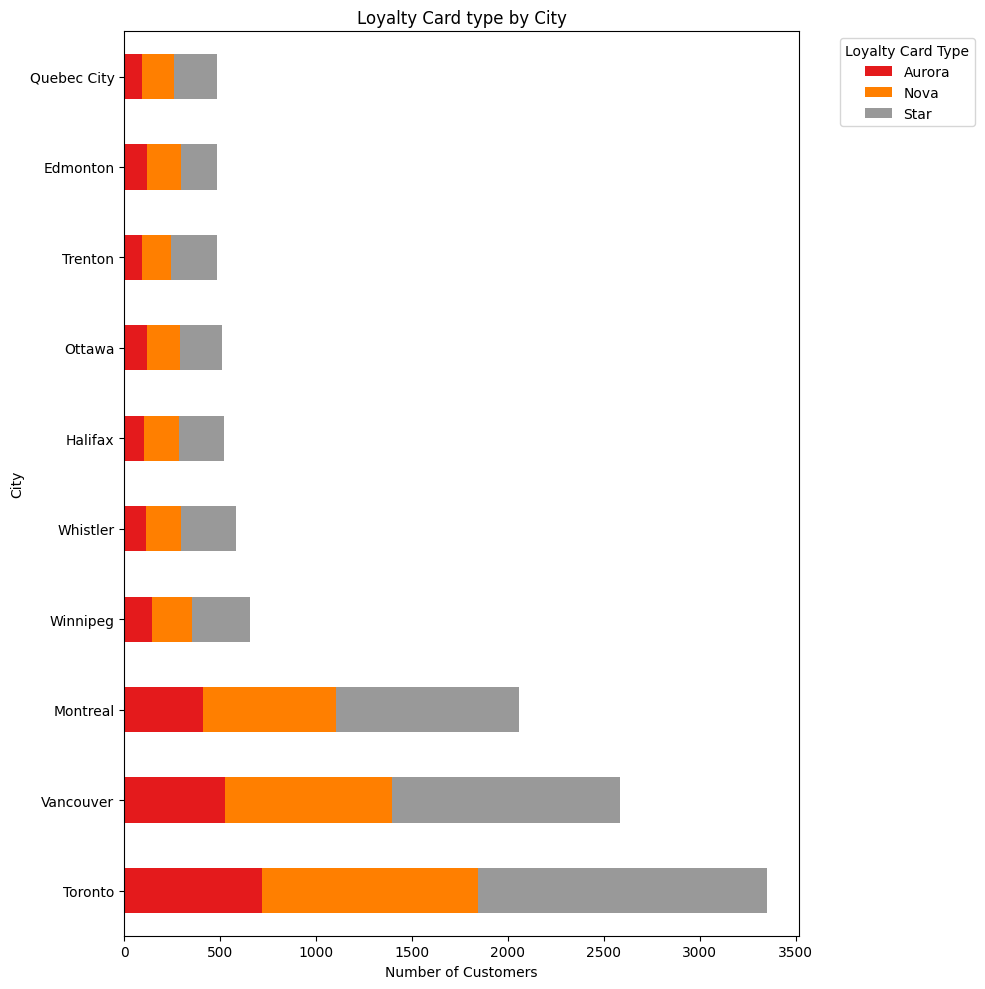

In [9]:
card_type_split_plt = card_type_split.sort_values(by=['total'],ascending=False).head(10).drop(columns='total')
#card_type_split_plt = card_type_split_plt.drop(columns='total')

ax = card_type_split_plt.plot(kind='barh', stacked=True, figsize=(10,10), colormap='Set1')

plt.title("Loyalty Card type by City")
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.legend(title='Loyalty Card Type', bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show


### Split of Customers by Enrollment type

In [10]:
loyalty_data['enrollment_type'].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [11]:
enrollment_type_temp = loyalty_data.groupby(['city','enrollment_type']).size().reset_index(name='count_of_customers')

enrollment_type_split = enrollment_type_temp.pivot(index='city',columns='enrollment_type',values='count_of_customers')

enrollment_type_split = enrollment_type_split.fillna(0).astype(int)

enrollment_type_split['Total'] = enrollment_type_split.sum(axis=1) 

enrollment_type_split = enrollment_type_split.sort_values(by='Total',ascending=False).head(10)

enrollment_type_split

enrollment_type,2018 Promotion,Standard,Total
city,,,
Toronto,173,3178,3351
Vancouver,151,2431,2582
Montreal,138,1921,2059
Winnipeg,20,638,658
Whistler,29,553,582
Halifax,19,499,518
Ottawa,32,477,509
Trenton,29,457,486
Edmonton,23,463,486


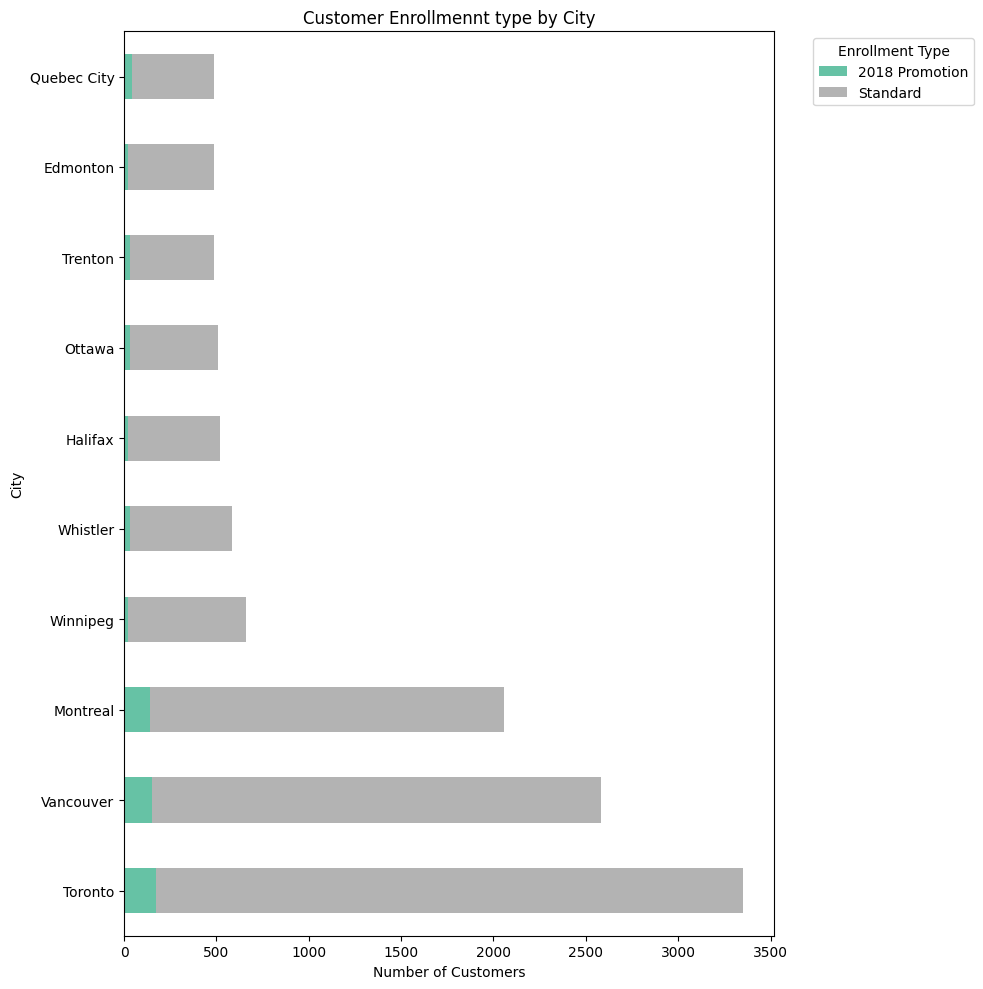

In [12]:
enrollment_type_spli_plt = enrollment_type_split.sort_values(by='Total',ascending=False).drop(columns='Total')

ax = enrollment_type_spli_plt.plot(kind='barh', stacked=True, figsize=(10,10), colormap='Set2')

plt.title('Customer Enrollmennt type by City')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.legend(title='Enrollment Type', bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

### CLV Analysis


In [13]:
loyalty_data['maratial_status'].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

In [14]:
# Finding out the Avg. CLV of a customer split by the Loylaty Card type 

clv_by_card = loyalty_data.groupby('loyalty_card')['clv'].agg(total_clv = 'sum',
                                                              avg_clv = 'mean', median_clv = 'median').reset_index()

clv_by_card[['total_clv','avg_clv','median_clv']] = clv_by_card[['total_clv','avg_clv','median_clv']].round(2)

clv_by_card = clv_by_card.sort_values(by='total_clv',ascending=False)

clv_by_card


,loyalty_card,total_clv,avg_clv,median_clv
2,Star,51486831.60,6741.76,4786.89
1,Nova,45626688.31,8045.62,5799.06
0,Aurora,36596641.41,10672.69,8140.00


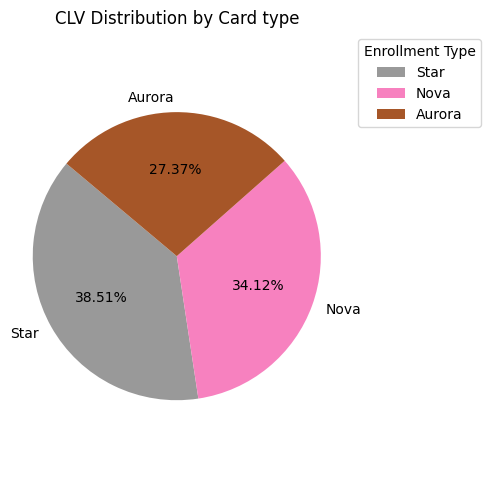

In [15]:
plt.figure(figsize=(5,5))

plt.pie(clv_by_card['total_clv'],
        labels=clv_by_card['loyalty_card'],
        autopct='%1.2f%%',
        startangle=140,
        colors=plt.cm.Set1_r.colors)

plt.title('CLV Distribution by Card type')
plt.axis('equal')
plt.legend(title='Enrollment Type', bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

### Enrollment Trend for each card type

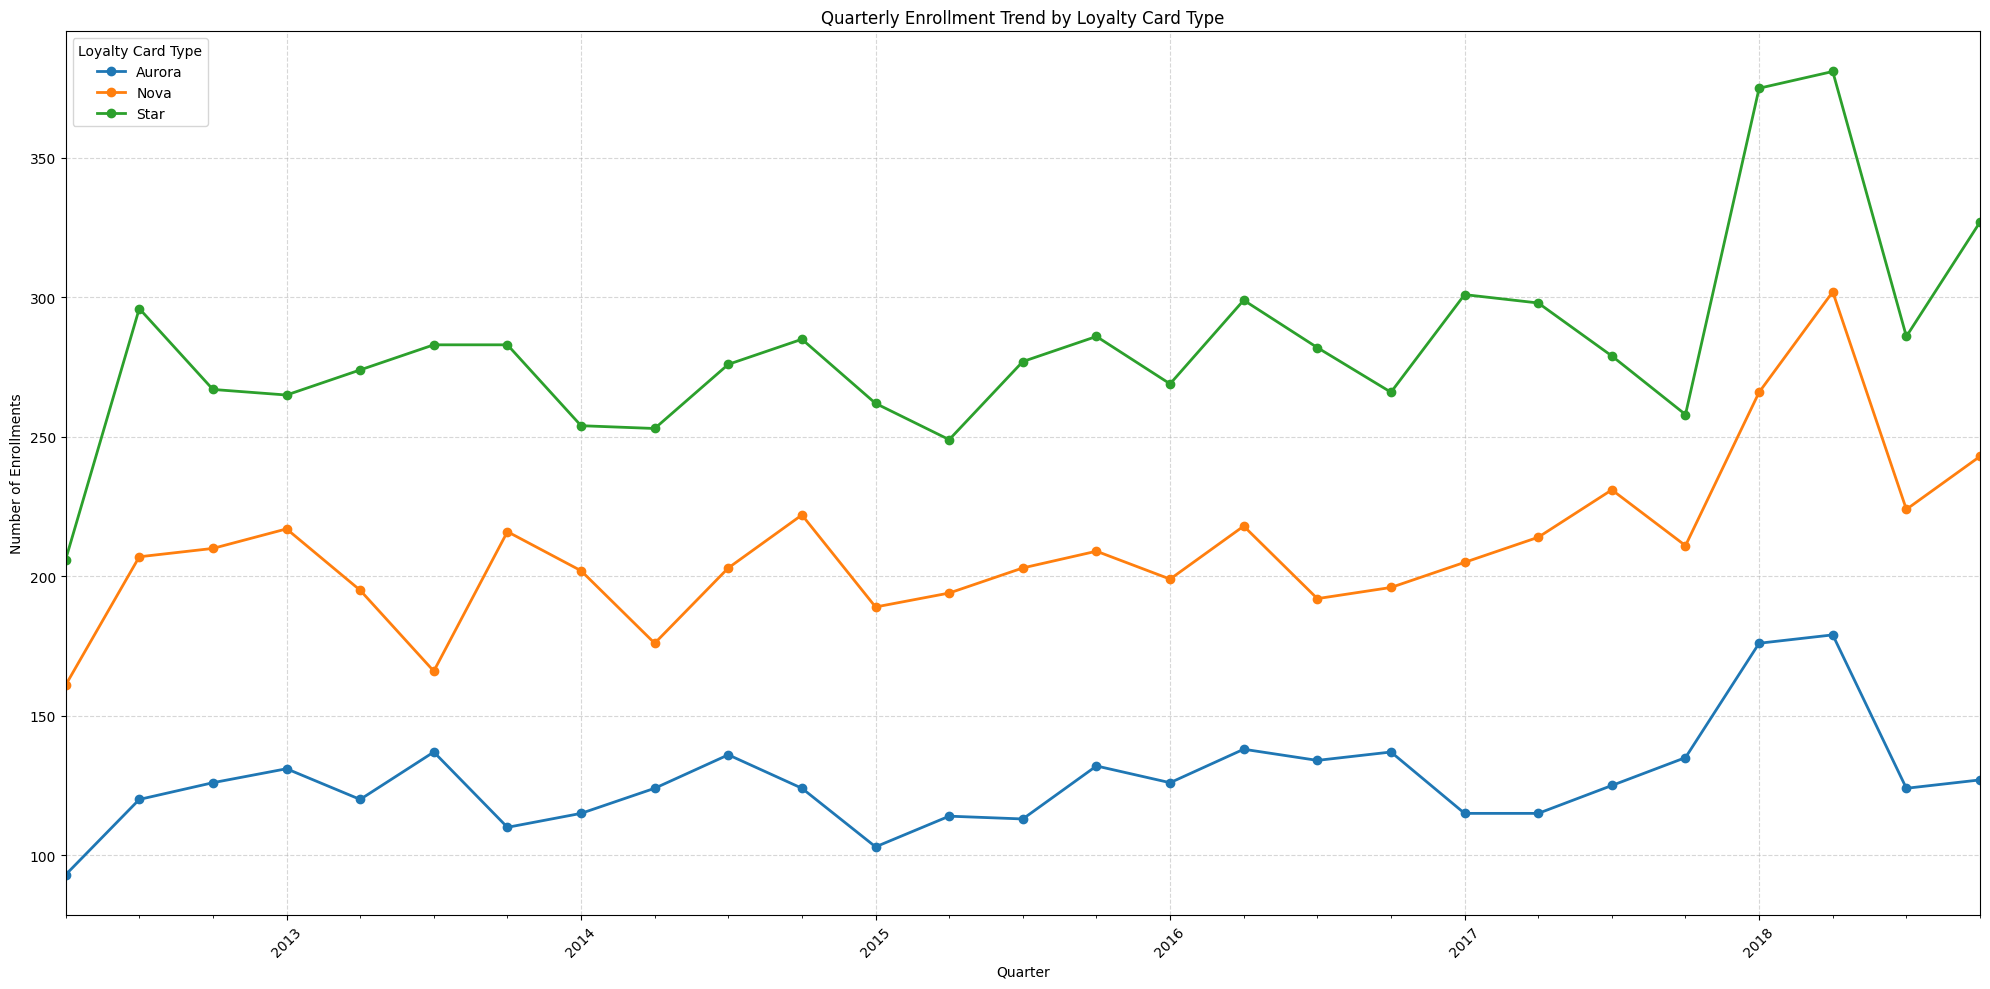

In [16]:
loyalty_data['enrollment_date'] = pd.to_datetime(loyalty_data['enrollment_date'], format='%Y-%m', errors='coerce')

loyalty_data['enrollment_quarter'] = loyalty_data['enrollment_date'].dt.to_period('Q')

# Grouping by quarter and loyalty card
quarterly_trend = (
    loyalty_data
    .groupby(['enrollment_quarter', 'loyalty_card'])
    .size()
    .reset_index(name='count')
)

# Pivot table creating
quarterly_pivot = quarterly_trend.pivot(index='enrollment_quarter', columns='loyalty_card', values='count').fillna(0)

# Converting PeriodIndex to timestamp 
quarterly_pivot.index = quarterly_pivot.index.to_timestamp()

# Plotting and formatting
ax = quarterly_pivot.plot(marker='o', linewidth=2, figsize=(20, 10))

ax.set_title('Quarterly Enrollment Trend by Loyalty Card Type')
ax.set_xlabel('Quarter')
ax.set_ylabel('Number of Enrollments')
ax.legend(title='Loyalty Card Type')
ax.grid(True, linestyle='--', alpha=0.5)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Cancellation Trend by card Type

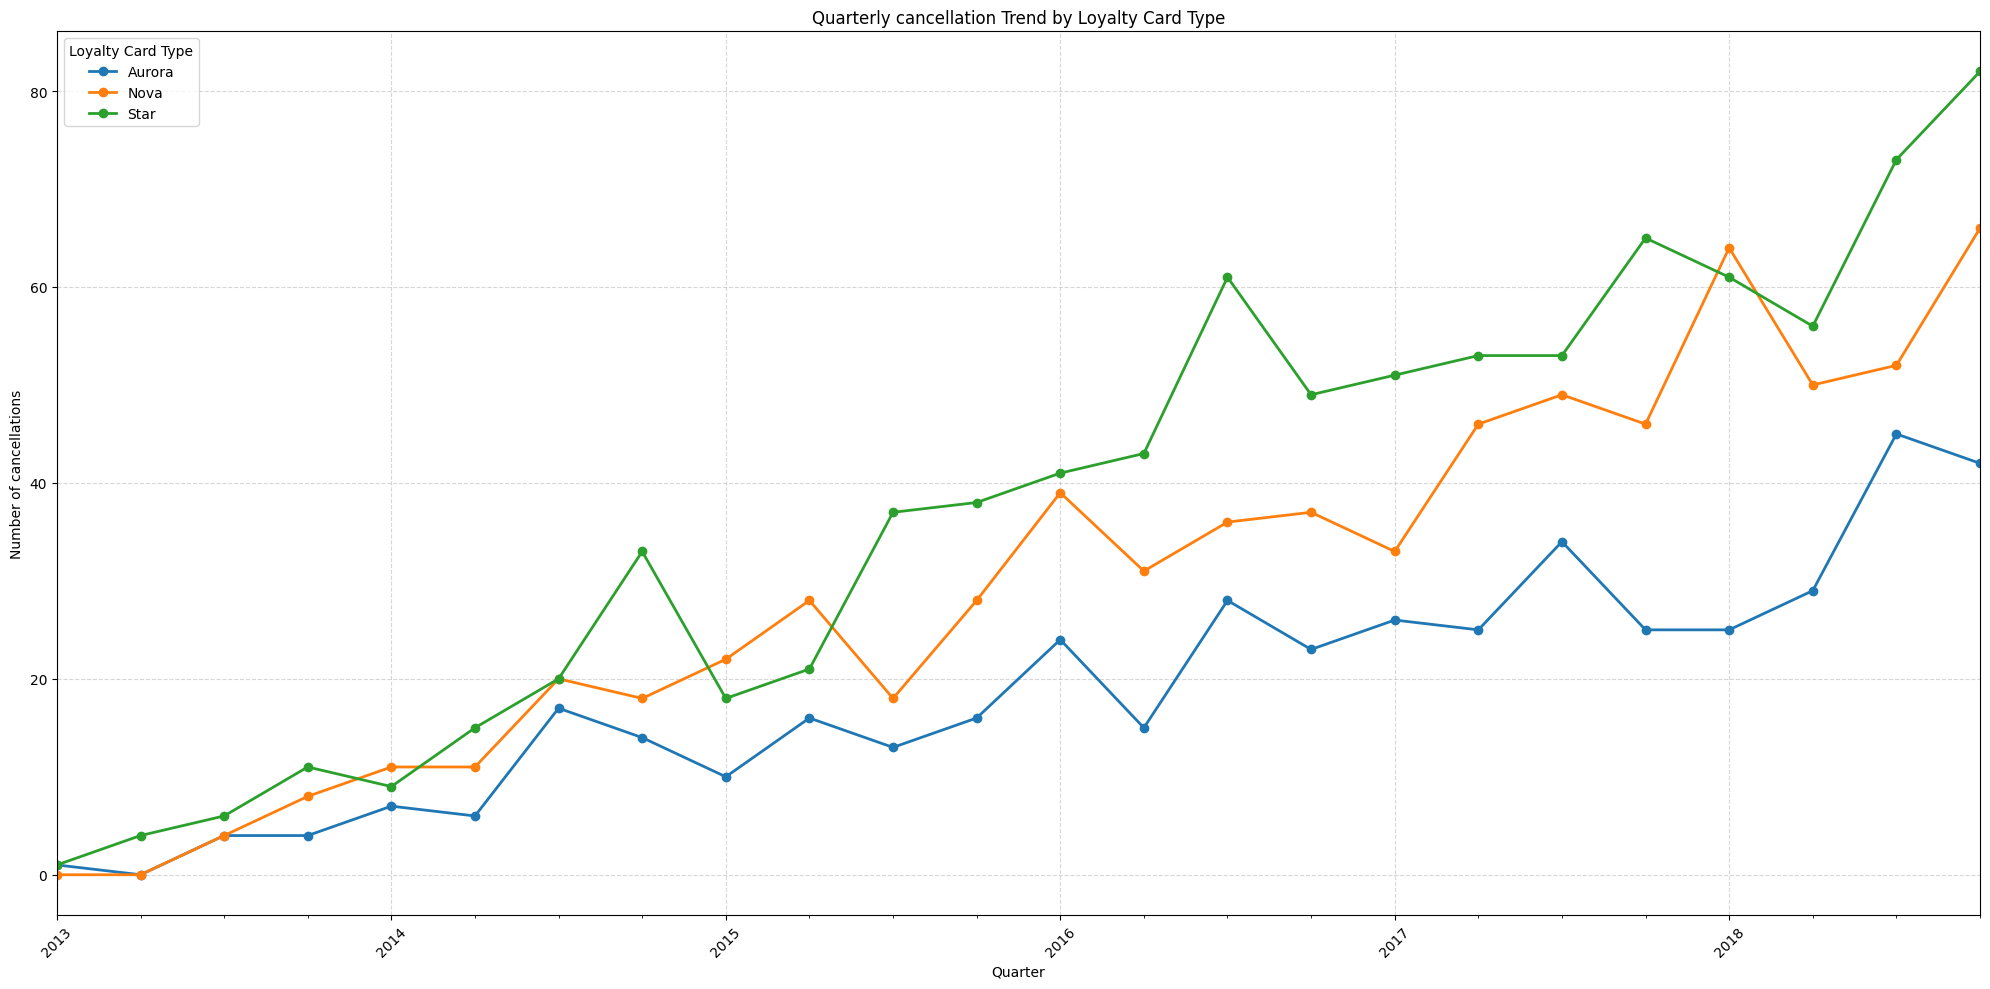

In [17]:
loyalty_data['cancellation_date'] = pd.to_datetime(loyalty_data['cancellation_date'], format='%Y-%m', errors='coerce')

loyalty_data['cancellation_quarter'] = loyalty_data['cancellation_date'].dt.to_period('Q')

# Grouping by quarter and loyalty card
quarterly_trend = (
    loyalty_data
    .groupby(['cancellation_quarter', 'loyalty_card'])
    .size()
    .reset_index(name='count')
)

# Pivot table creating
quarterly_pivot = quarterly_trend.pivot(index='cancellation_quarter', columns='loyalty_card', values='count').fillna(0)

# Converting PeriodIndex to timestamp 
quarterly_pivot.index = quarterly_pivot.index.to_timestamp()

# Plotting and formatting
ax = quarterly_pivot.plot(marker='o', linewidth=2, figsize=(20, 10))

ax.set_title('Quarterly cancellation Trend by Loyalty Card Type')
ax.set_xlabel('Quarter')
ax.set_ylabel('Number of cancellations')
ax.legend(title='Loyalty Card Type')
ax.grid(True, linestyle='--', alpha=0.5)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Maratial Status trends and analysis

In [18]:
clv_by_maratial = (loyalty_data.groupby('maratial_status')['clv']
                   .agg(['mean','median','count']).reset_index()
                   .round(2).sort_values(by = 'count', ascending=False))

clv_by_maratial

,maratial_status,mean,median,count
1,Married,8058.20,5824.77,9735
2,Single,7719.49,5583.07,4484
0,Divorced,8200.69,5872.96,2518


In [ ]:
enrollement_by_status = (loyalty_data.groupby(['enrollment_year','maratial_status']).size().unstack(fill_value=0))

enrollement_by_status

maratial_status,Divorced,Married,Single
enrollment_year,,,
2012,254,979,453
2013,324,1411,662
2014,365,1357,648
2015,360,1342,629
2016,350,1465,641
2017,366,1464,657
2018,499,1717,794


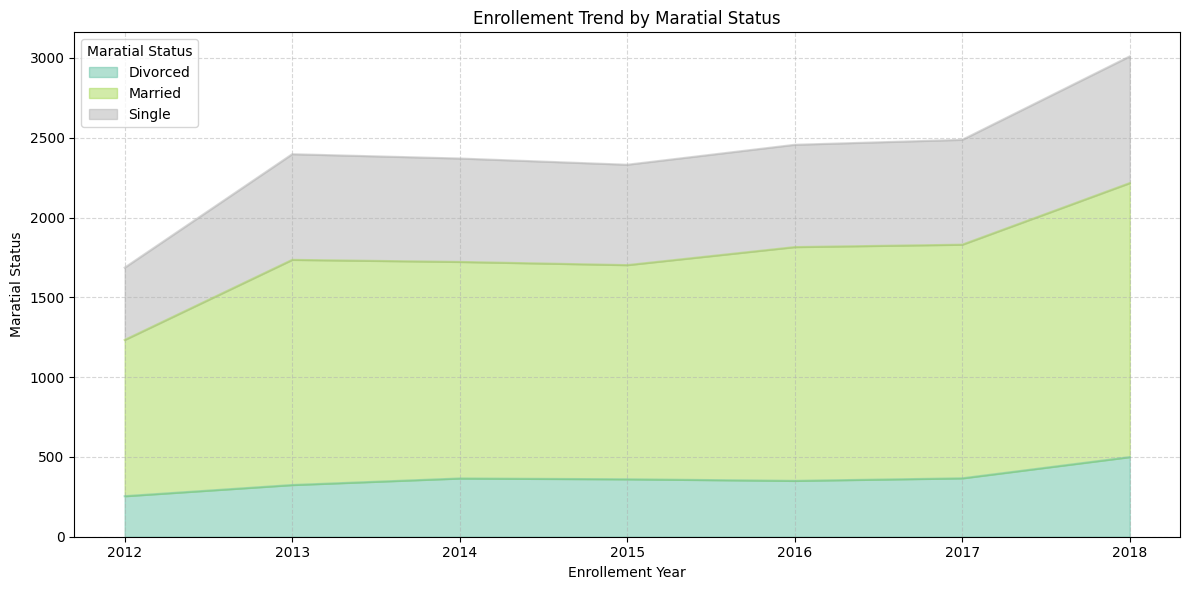

In [22]:
enrollement_by_status.plot(kind='area',stacked=True,figsize=(12,6),colormap='Set2', alpha = 0.5)

plt.title('Enrollement Trend by Maratial Status')
plt.xlabel('Enrollement Year')
plt.ylabel('Maratial Status')
plt.grid(True, linestyle='--', alpha = 0.5)
plt.tight_layout()
plt.legend(title = 'Maratial Status')
plt.show()

In [33]:
cardshare_by_status = (loyalty_data.groupby(['maratial_status', 'loyalty_card']).size()
                      .groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack()
                      .round(2))

cardshare_by_status

,loyalty_card,Aurora,Nova,Star
maratial_status,maratial_status,,,
Divorced,Divorced,20.02,33.72,46.27
Married,Married,21.37,34.83,43.80
Single,Single,18.84,31.91,49.24


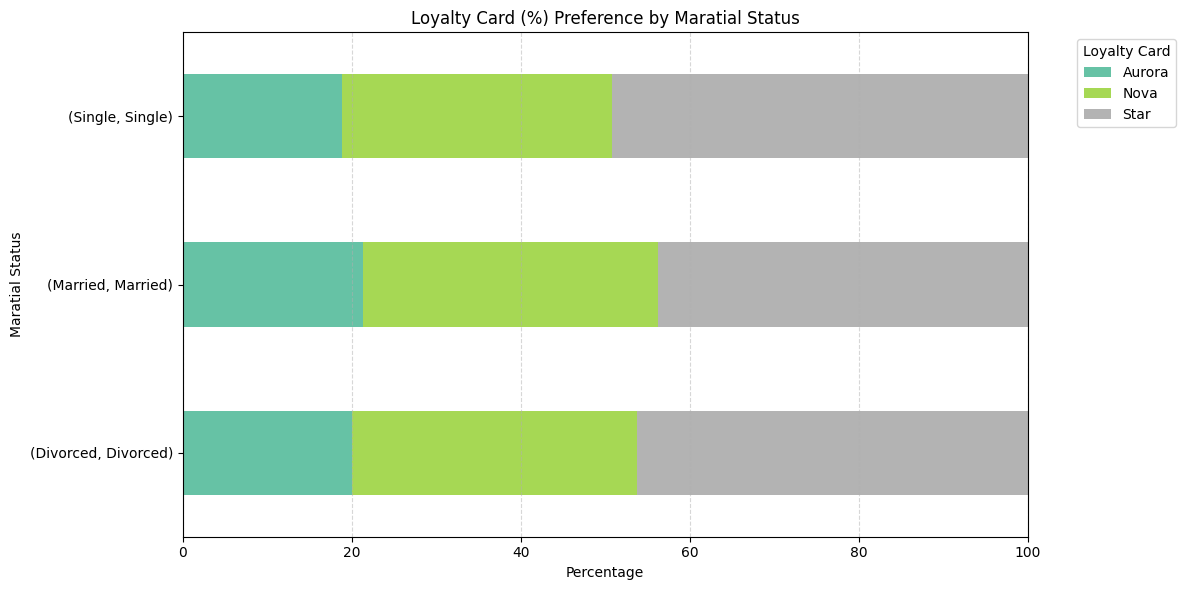

In [37]:
cardshare_by_status.plot(kind='barh', stacked=True, figsize=(12,6), colormap='Set2')

plt.title('Loyalty Card (%) Preference by Maratial Status')
plt.xlabel('Percentage')
plt.ylabel('Maratial Status')
plt.xlim(0,100)
plt.legend(title = 'Loyalty Card', bbox_to_anchor = (1.05,1), loc= 'upper left')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

In [40]:
cancellation_by_status = (loyalty_data.groupby(['cancellation_year','maratial_status']).size().unstack(fill_value=0))

# Remove the row where cancellation_year == 0
cancellation_by_status = cancellation_by_status.loc[cancellation_by_status.index != 0]

cancellation_by_status

maratial_status,Divorced,Married,Single
cancellation_year,,,
2013,9,24,10
2014,30,103,48
2015,31,172,62
2016,56,263,108
2017,70,276,160
2018,95,376,174


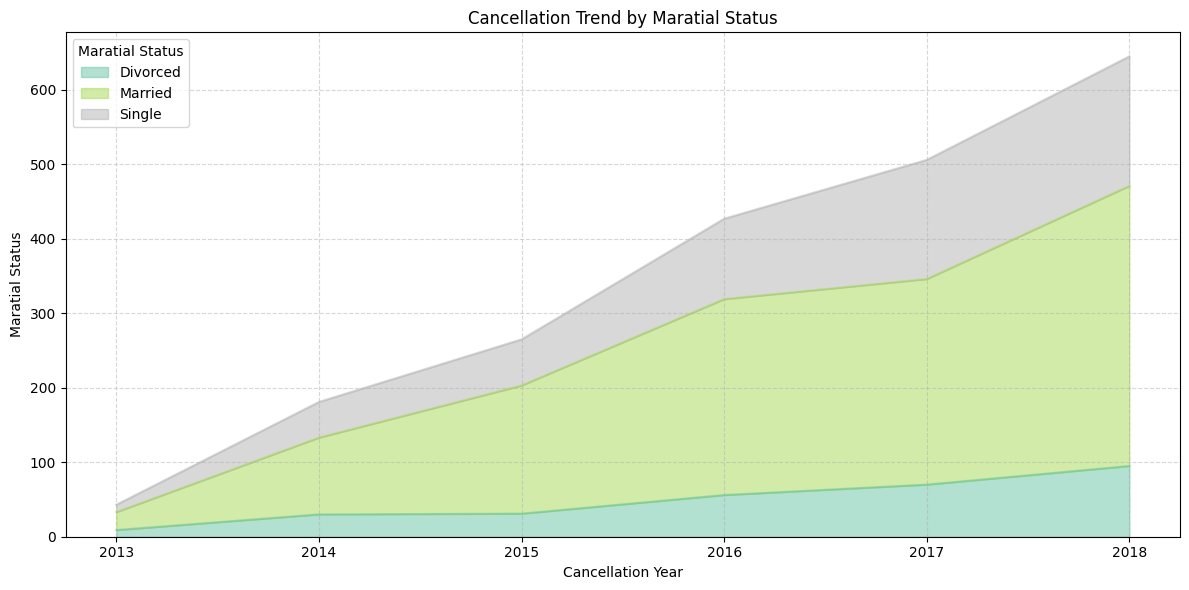

In [41]:
cancellation_by_status.plot(kind='area',stacked=True,figsize=(12,6),colormap='Set2', alpha = 0.5)

plt.title('Cancellation Trend by Maratial Status')
plt.xlabel('Cancellation Year')
plt.ylabel('Maratial Status')
plt.grid(True, linestyle='--', alpha = 0.5)
plt.tight_layout()
plt.legend(title = 'Maratial Status')
plt.show()  